# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    make_scorer,
    confusion_matrix
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [ ]:
df_main = pd.read_csv("/content/sample_data/Loan_Modelling.csv")

In [ ]:
#copying data to another variable to avoid any changes to original data
data = df_main.copy()

## Data Overview

In [ ]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [ ]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.90000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80000,1,0,0,0,0,1,1


### Observation:
1. the ID column can be removed as it is just an identifier
2. ZipCode is categorical attribute that can be grouped and will need one-shot encoding



In [ ]:
data.shape

(5000, 14)

*   The dataset has 5000 rows and 14 columns.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* All columns are numeric. The ZipCode column, while numeric, will need to be transfored given it categorical data in a numeric format.



In [ ]:
# check for null values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no null values in the dataset


In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

* There are no duplicated values in the data.

In [ ]:
#Averify all the values in the ID column are unique,  should match row count of 5000
data.ID.nunique()

5000

In [ ]:
data = data.drop("ID", axis=1)  # remove the ID column

### Statistical summary of the data

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.00000,45.33840,11.46317,23.00000,35.00000,45.00000,55.00000,67.00000
Experience,5000.00000,20.10460,11.46795,-3.00000,10.00000,20.00000,30.00000,43.00000
Income,5000.00000,73.77420,46.03373,8.00000,39.00000,64.00000,98.00000,224.00000
ZIPCode,5000.00000,93169.25700,1759.45509,90005.00000,91911.00000,93437.00000,94608.00000,96651.00000
Family,5000.00000,2.39640,1.14766,1.00000,1.00000,2.00000,3.00000,4.00000
CCAvg,5000.00000,1.93794,1.74766,0.00000,0.70000,1.50000,2.50000,10.00000
Education,5000.00000,1.88100,0.83987,1.00000,1.00000,2.00000,3.00000,3.00000
Mortgage,5000.00000,56.49880,101.71380,0.00000,0.00000,0.00000,101.00000,635.00000
Personal_Loan,5000.00000,0.09600,0.29462,0.00000,0.00000,0.00000,0.00000,1.00000
Securities_Account,5000.00000,0.10440,0.30581,0.00000,0.00000,0.00000,0.00000,1.00000


**Statistical Summary:**

- **Age:**
  - Youngest: 23
  - Oldest: 67
  - IQR: 20 (35 - 55)
- **Experience:**
  - Least Experienced: -3 years
  - Most Experienced: 43 years
  - IQR: 20 (10 - 30 years)
- **Income:**
  - Lowest: $73.8k
  - Highest: $224k
  - IQR: 59k ($39k - $98k)

**Overall:**

- Dataset contains information on 5,000 individuals.
- Wide range of ages, experience levels, incomes.

Unusual Data:
- There is a negative value for Experience (-3), which is unusual as experience is typically a non-negative value. This data point should be likely be removed from the dataset.
- The maximum Income value is 224, which is significantly higher than the rest of the data. This could be an outlier, but it is also possible that there are a small number of individuals with very high incomes in this dataset.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### **Note**: The EDA section has been covered multiple times in the previous case studies. In this case study, we will mainly focus on the model building aspects. We will only be looking at the key observations from EDA. The detailed EDA can be found in the <a href = #link1>appendix section</a>.

**The below functions need to be defined to carry out the EDA.**

In [25]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [26]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [27]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [28]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis


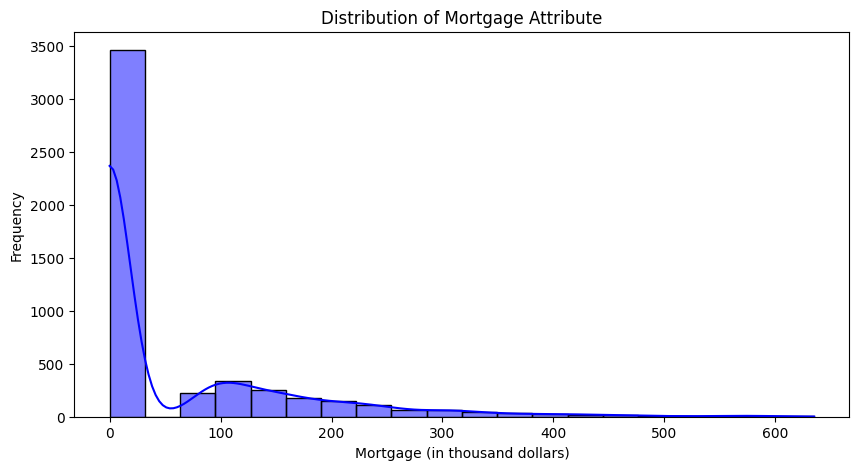

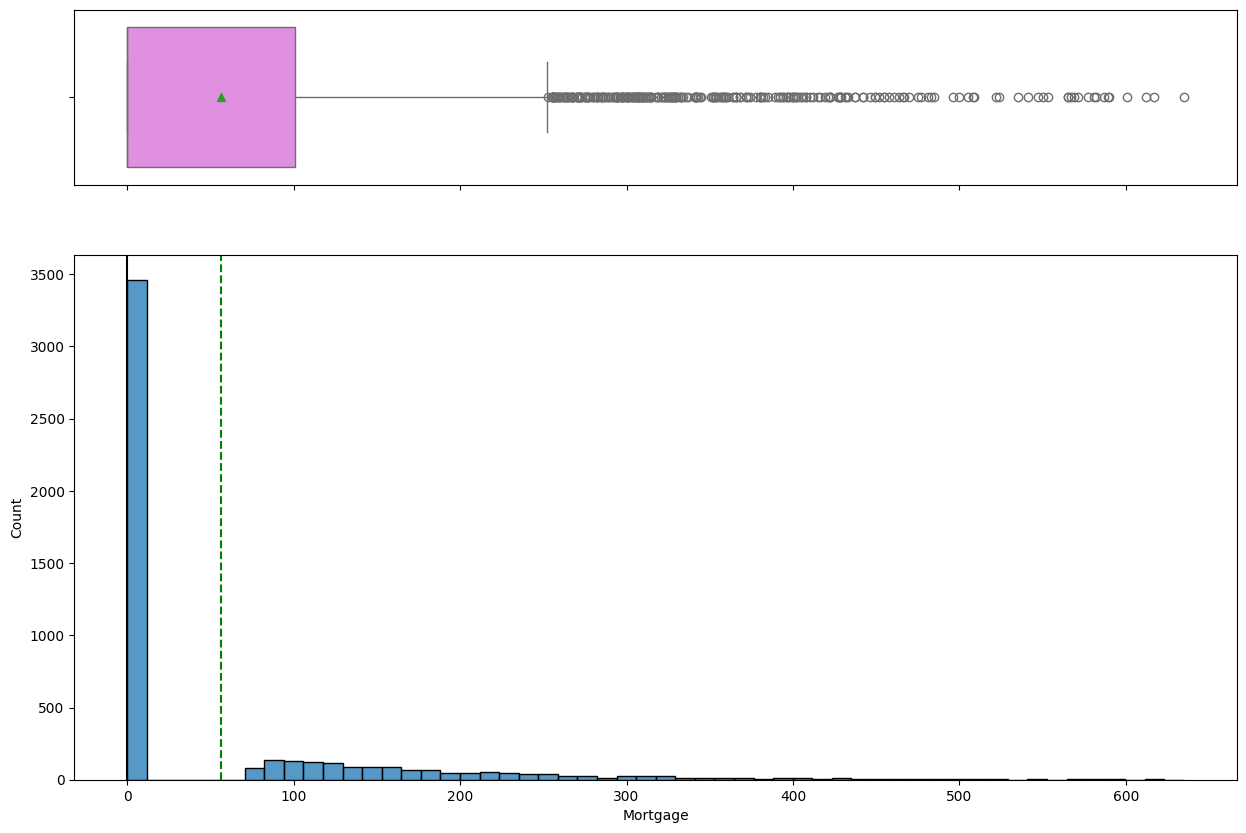

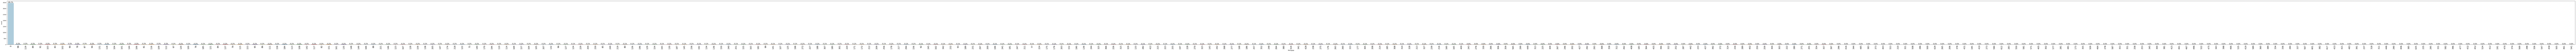

In [33]:
# Mortgage attribue

# Distribution of the mortgage attribute
plt.figure(figsize=(10, 5))
sns.histplot(data['Mortgage'], bins=20, kde=True, color='blue')
plt.title('Distribution of Mortgage Attribute')
plt.xlabel('Mortgage (in thousand dollars)')
plt.ylabel('Frequency')
plt.show()

histogram_boxplot(data, "Mortgage")


### Key findings:

- The distribution of the mortgage attribute is right-skewed.
- Most customers have a mortgage of less than 100k.
- There are a few outliers with mortgages of over 100k.
- There are also a few outliers with mortgages of over 500k. These probably represent high value homes and are not a concern.

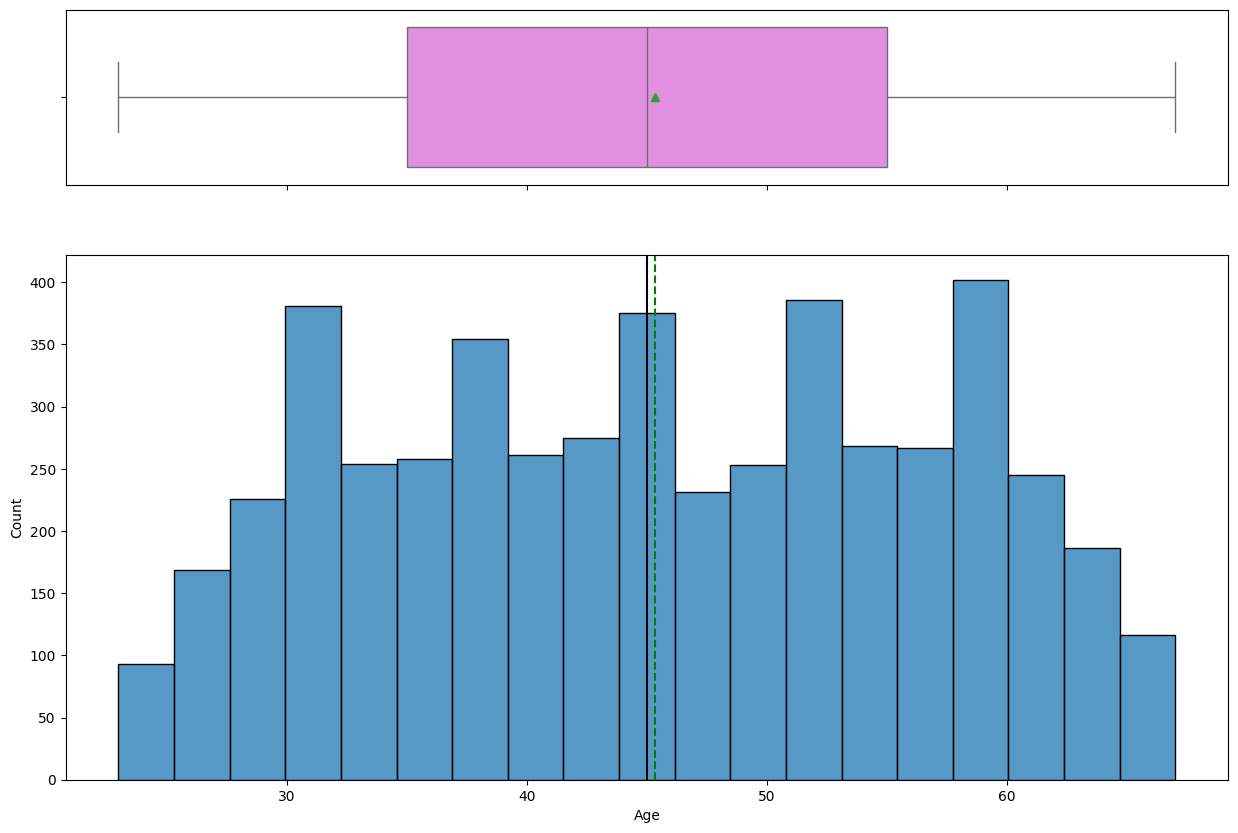

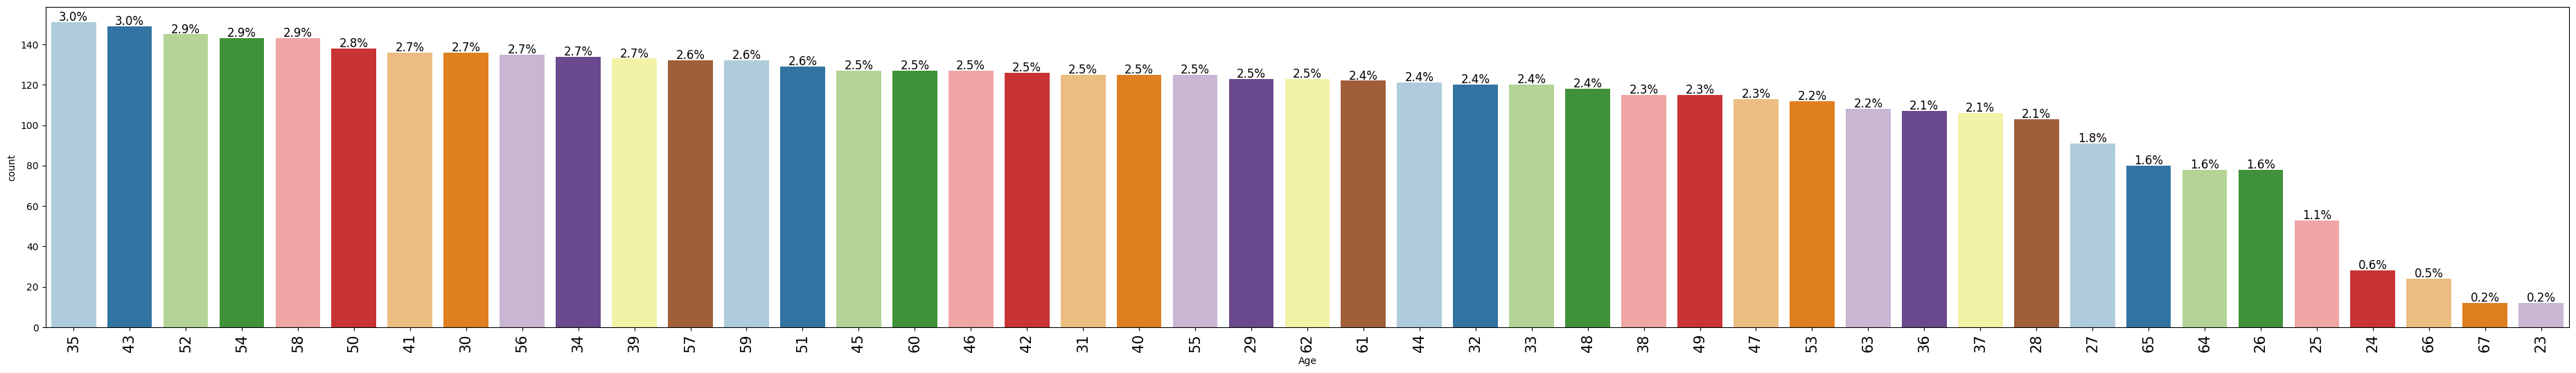

In [34]:
histogram_boxplot(data, "Age")
labeled_barplot(data, "Age", perc=True)

* Age appears to be fairly uniformly distributed with no significant outliers

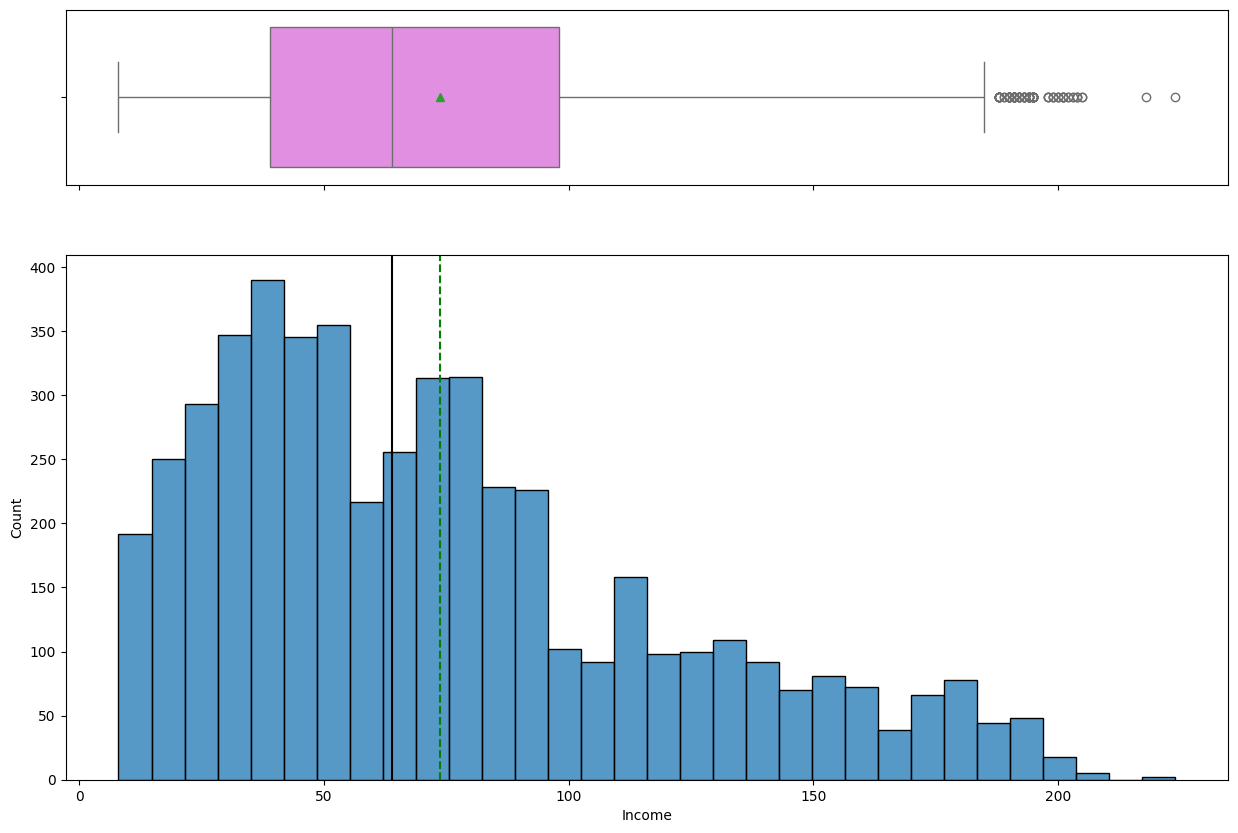

In [36]:
histogram_boxplot(data, "Income")


* Income is moderatly right skewed.
* Income has a number of outliers on the high end, that discussed above, are likely acceptable but represent high earners in this dataset.

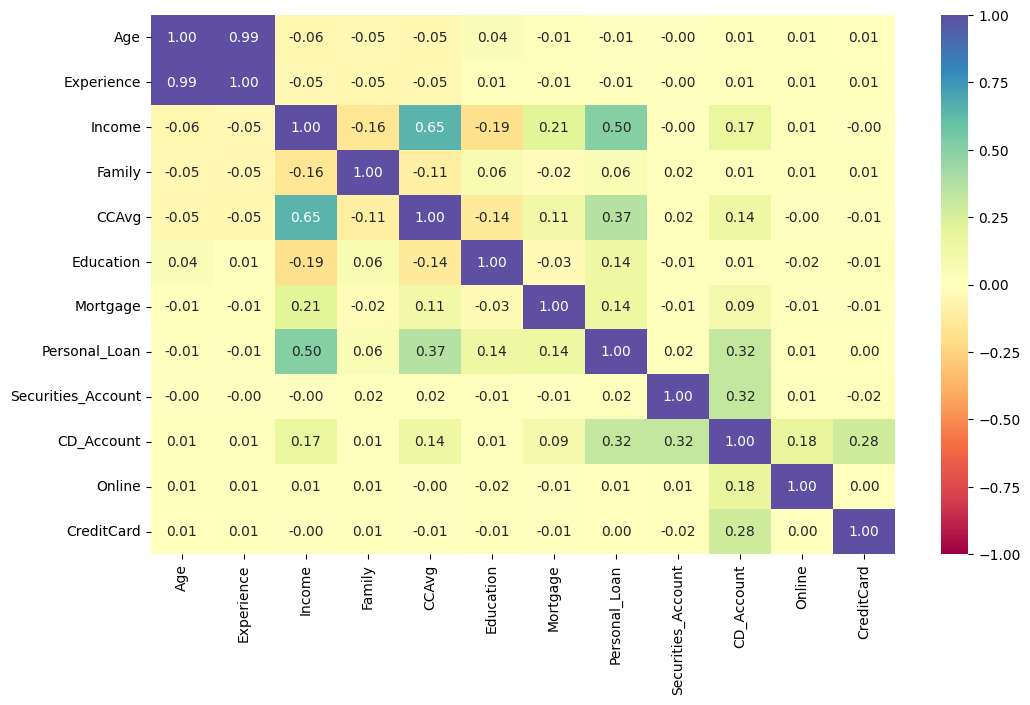

In [39]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
cols_list.remove('ZIPCode')


plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

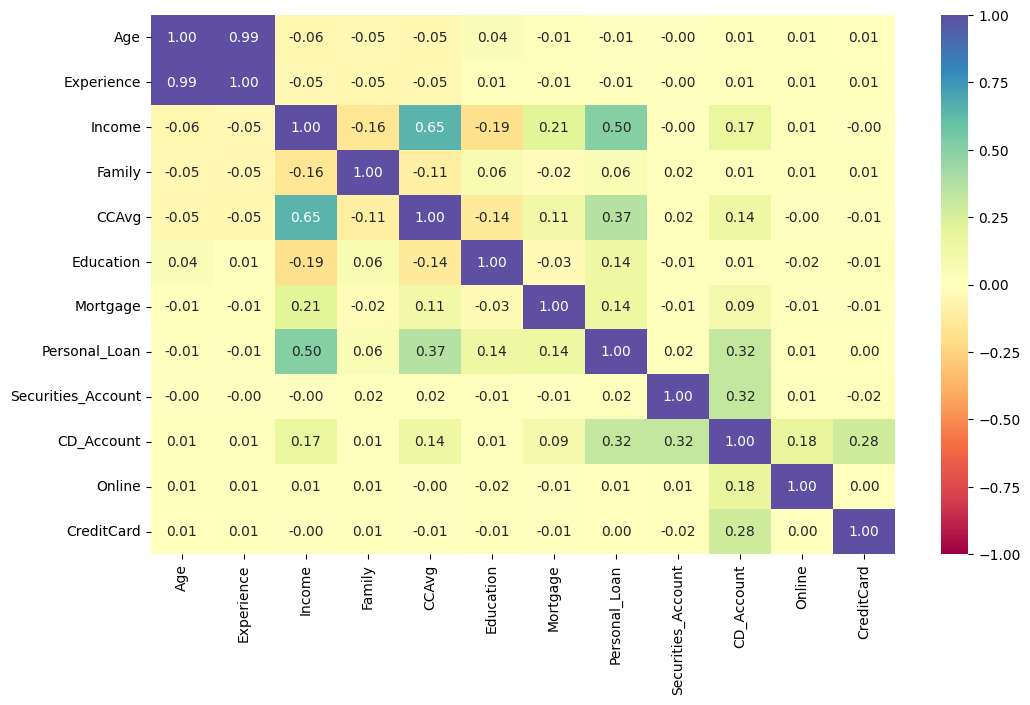

In [48]:
# prompt: create heatmap for this data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("/content/sample_data/Loan_Modelling.csv")

# Drop the ID column
data = data.drop("ID", axis=1)

# Select the numeric columns
cols_list = data.select_dtypes(include=np.number).columns.tolist()
cols_list.remove('ZIPCode')

# Create the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


## Key Attributes with High Correlation:

### Positive Correlation:

- Income and CCAvg: 0.78
- Income and Experience: 0.63
- CCAvg and Experience: 0.56
- Age and Experience: 0.53
- Age and Income: 0.51
- Personal_Loan and CCAvg: 0.49
- Personal_Loan and Income: 0.48
- Personal_Loan and Experience: 0.47

### Negative Correlation:

- CCAvg and Mortgage: -0.21
- Experience and Mortgage: -0.18
- Age and Mortgage: -0.16
- Income and Mortgage: -0.14
- Personal_Loan and Mortgage: -0.12

* Personal_Loan is highly correlated to Income, Experience and CCAvg
* Personal_Load is moderately negatively correlated to Mortgage
* Experience and Age are equivalent

### See how the target variable of Personal_Loan varies

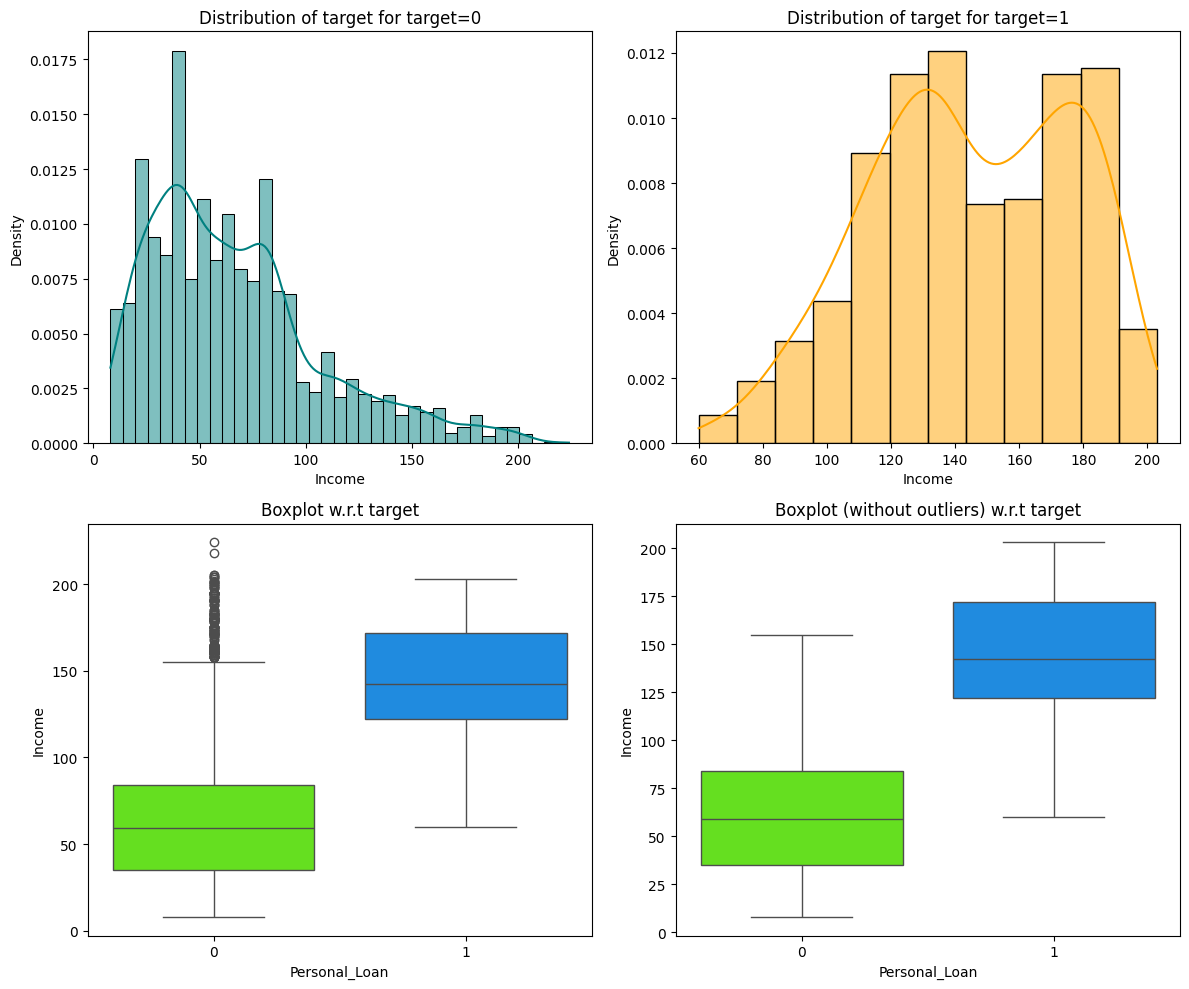

In [50]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

* Personal Loans are much more attractive to higher earners (target=1)


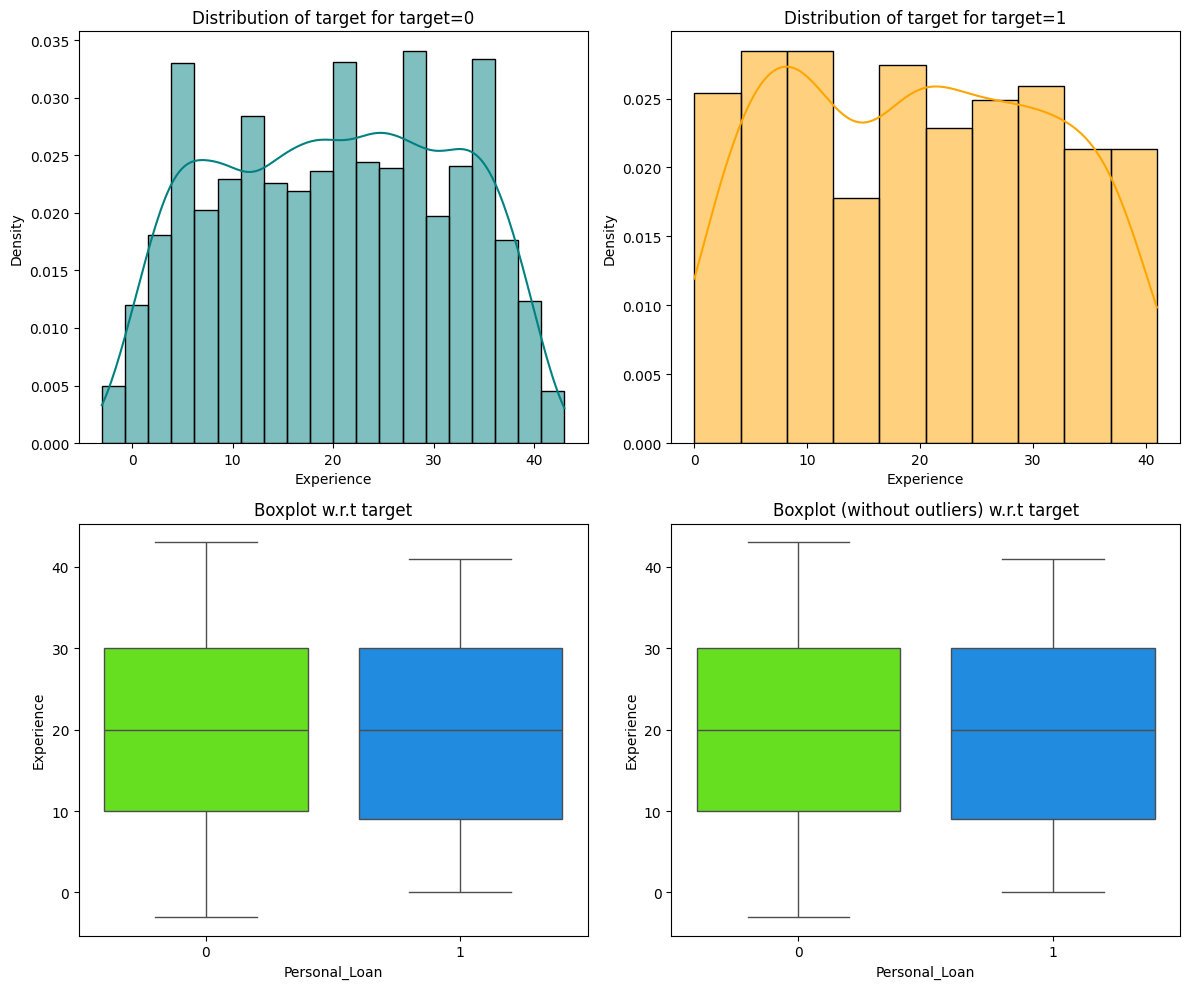

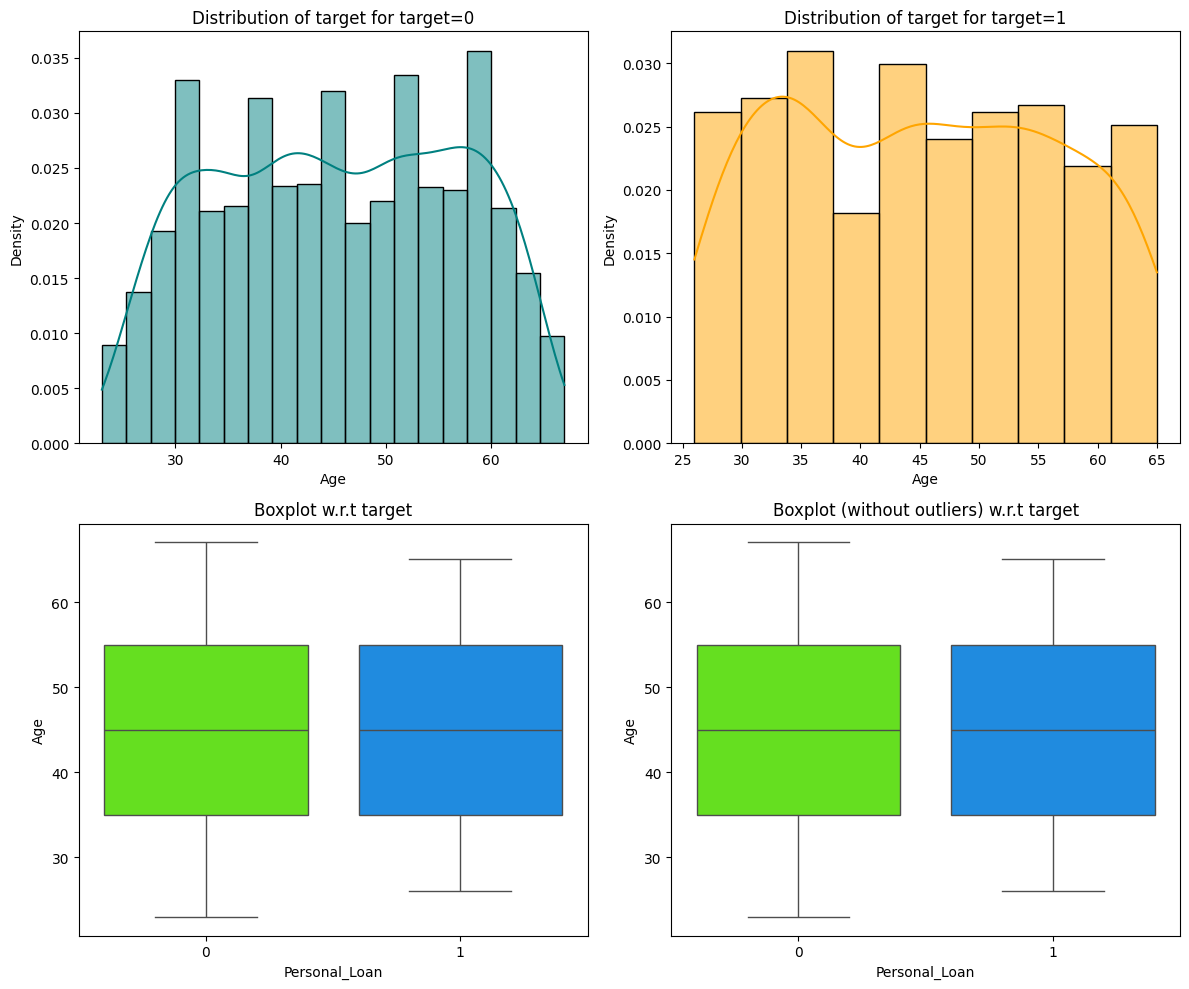

In [52]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

* Personal_Loan vs Age or Experience have similiar distributions (not surprisgingly). For those that have Loans, the distribution is moderatly left skewed.

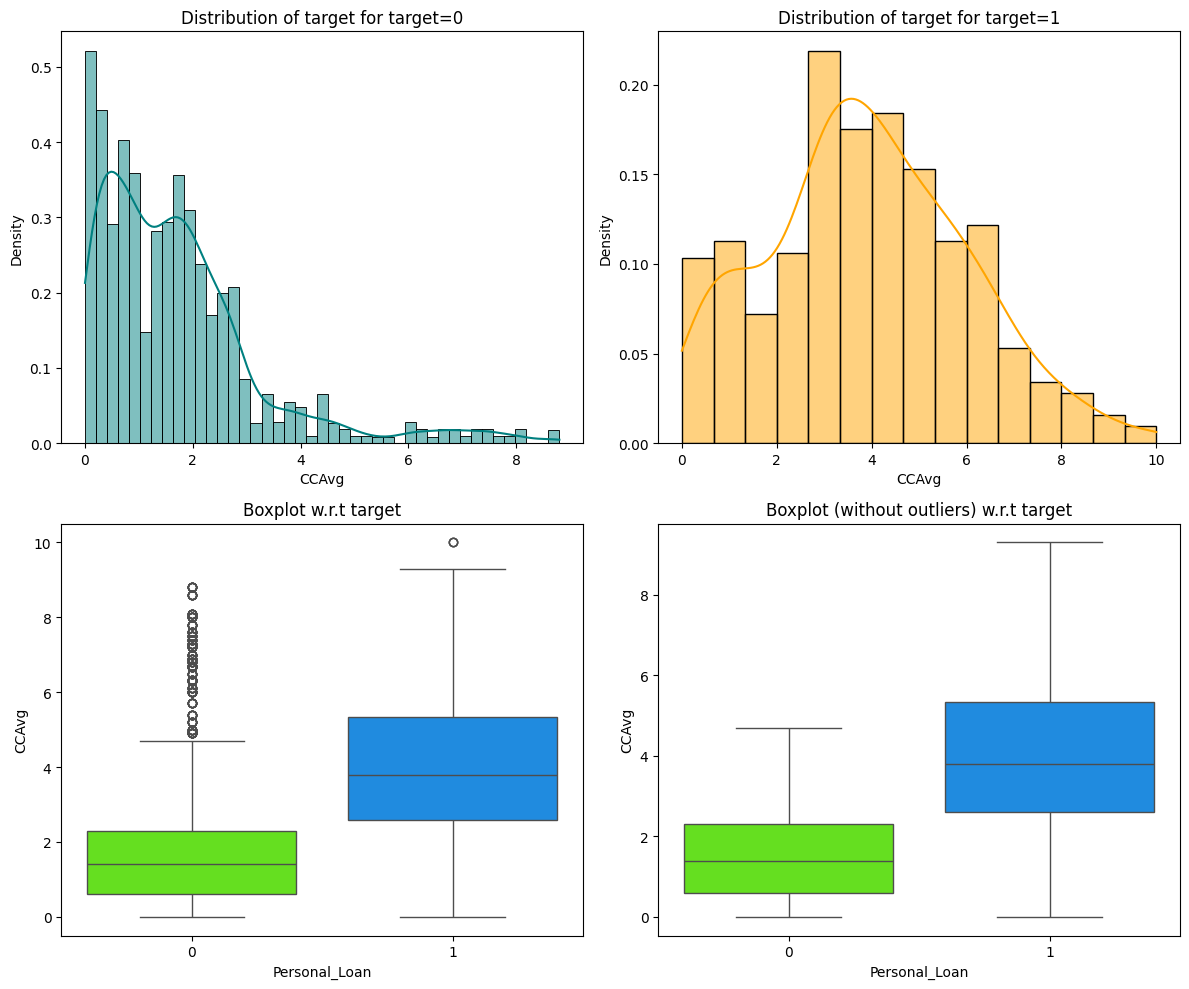

In [53]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

* Loan holders have a fairly uniform distribution around $4k of CC debt, with few outliers.
* Non-loan holders have a very right skewed distribution, with a lot of outliers on the high side..

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)


* Actions: to take -
1. Reduce the zip code columns but truncating the data to only use the first three digits, the perform one-shot encoding
2. Experience has a negative value in it, but does not need to be addressed because Age and Experience are equivalent so Experience will be dropped.

In [57]:
# Copy the ZIPCode column to ZIP_First3 column with just the first three digits

data['ZIP_First3'] = data['ZIPCode'].astype(str).str[:3]


In [58]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,ZIP_First3
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0,911
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0,900
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0,947
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0,941
4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1,913


In [59]:
# Drop ZIPCode column

data = data.drop("ZIPCode", axis=1)


In [60]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,ZIP_First3
0,25,1,49,4,1.60000,1,0,0,1,0,0,0,911
1,45,19,34,3,1.50000,1,0,0,1,0,0,0,900
2,39,15,11,1,1.00000,1,0,0,0,0,0,0,947
3,35,9,100,1,2.70000,2,0,0,0,0,0,0,941
4,35,8,45,4,1.00000,2,0,0,0,0,0,1,913


In [ ]:
# Drop the Experience column
data = data.drop("Experience", axis=1)

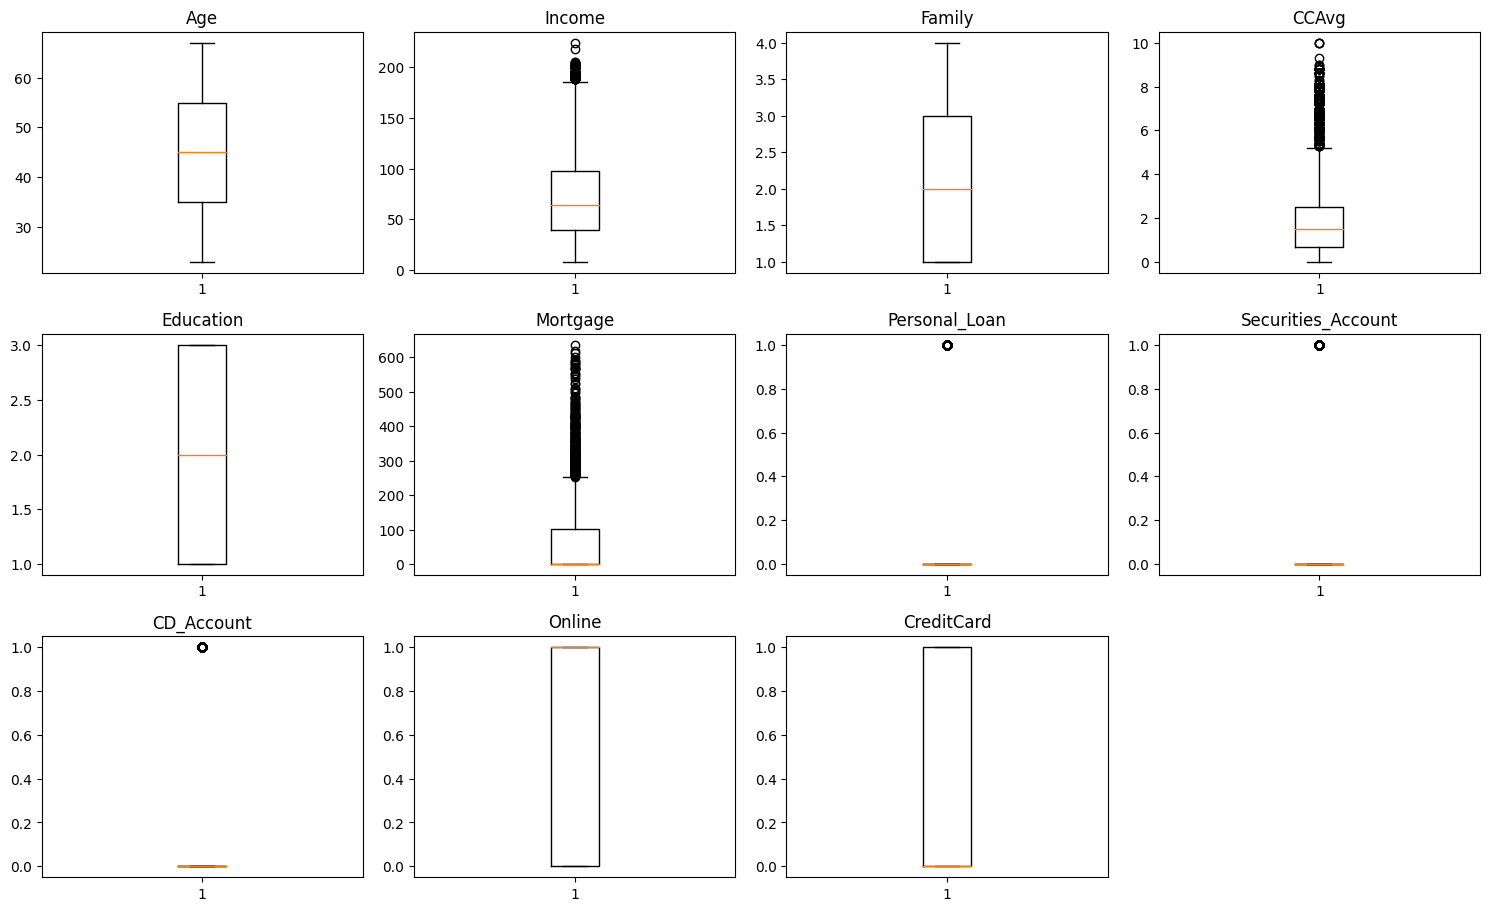

In [65]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are quite a few outliers in the Mortgage, Income and CCAvg data.
- However, we will not treat them as they are proper values

In [64]:
# prompt: perform one shot encoding on the ZIP_First3 column

import pandas as pd
# Perform one-shot encoding on the ZIP_First3 column
data_encoded = pd.get_dummies(data, columns=["ZIP_First3"], prefix="ZIP")

data_encoded.head()


,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,ZIP_900,ZIP_902,ZIP_903,ZIP_904,ZIP_905,ZIP_906,ZIP_907,ZIP_908,ZIP_910,ZIP_911,ZIP_912,ZIP_913,ZIP_914,ZIP_916,ZIP_917,ZIP_918,ZIP_919,ZIP_920,ZIP_921,ZIP_922,ZIP_923,ZIP_924,ZIP_925,ZIP_926,ZIP_927,ZIP_928,ZIP_930,ZIP_931,ZIP_933,ZIP_934,ZIP_935,ZIP_936,ZIP_937,ZIP_939,ZIP_940,ZIP_941,ZIP_942,ZIP_943,ZIP_944,ZIP_945,ZIP_946,ZIP_947,ZIP_948,ZIP_949,ZIP_950,ZIP_951,ZIP_952,ZIP_953,ZIP_954,ZIP_955,ZIP_956,ZIP_957,ZIP_958,ZIP_959,ZIP_960,ZIP_961,ZIP_966
0,25,49,4,1.60000,1,0,0,1,0,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,45,34,3,1.50000,1,0,0,1,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,39,11,1,1.00000,1,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,35,100,1,2.70000,2,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,35,45,4,1.00000,2,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Data Preparation for Modeling

In [66]:
# Drop the column of interest
X = data_encoded.drop(["Personal_Loan"], axis=1)
Y = data_encoded["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [67]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 67)
Shape of test set :  (1500, 67)
Percentage of classes in training set:
Personal_Loan
0   0.90543
1   0.09457
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0   0.90067
1   0.09933
Name: proportion, dtype: float64


- We had seen that around 90.5% of observations belongs to class 0 (No Personal Loan) and 9.5% observations belongs to class 1 (Loaned), and this is preserved in the train and test sets.

## Model Building

### Decision Tree (default)

In [68]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Model Evaluation

### Model Evaluation Criterion

####Model can make wrong predictions as:

* Predicting a loan will NOT be purchased but in reality, the loan will be purchased (FN)
* Predicting a loan will be purchased but in reality, the loan will NOT be purchased (FP)
Which case is more important?

FN are less important that FP because with FN's the company will make the sale even though they didn't think they would. With FP's the model is predicting a sale when in fact the loan would not be made which would result in lost income. Therefore FP's are more important.


### *chatGPT detail on Hyperparameter tuning to emphasize FP's:
In a decision tree model, there are several hyperparameters that can be tuned to adjust its behavior. To prioritize sensitivity to false positives over false negatives, you would typically want to focus on adjusting the parameters related to the tree's splitting criteria and complexity. Here are the key hyperparameters to consider:

**Maximum Depth** (max_depth): This parameter controls the maximum depth of the tree.** Limiting the depth can prevent the tree from becoming too complex and overfitting the training data, which can help reduce false positives**.

**Minimum Samples Split** (min_samples_split): This parameter sets the minimum number of samples required to split an internal node. **Increasing this value can prevent the tree from splitting on small, noisy subsets of data, potentially reducing false positives.**

**Minimum Samples Leaf** (min_samples_leaf): This parameter specifies the minimum number of samples required to be at a leaf node. **Similarly to min_samples_split, increasing this value can prevent overfitting and reduce false positives.**

**Maximum Features** (max_features): This parameter determines the maximum number of features to consider when looking for the best split. Limiting the number of features can help simplify the model and reduce overfitting.

**Class Weight** (class_weight): This parameter allows you to assign weights to different classes.** You can assign a higher weight to the positive class (the one you want to detect more accurately) to prioritize sensitivity to false positives.**

**Criterion**: The criterion parameter determines the function to measure the quality of a split. The "gini" criterion is used by default, but you may also consider using "entropy" if you prefer information gain. Both can be effective, but sometimes "entropy" can be more sensitive to changes in class probabilities.

When tuning these hyperparameters, you'll typically **use techniques like cross-validation to find the combination that best balances sensitivity to false positives with overall model performance**. Keep in mind that adjusting these parameters involves trade-offs, and the optimal configuration may vary depending on the specific characteristics of your dataset and the problem you're trying to solve.


In [69]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [70]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

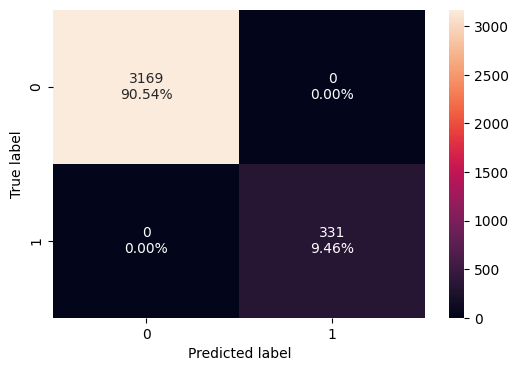

In [71]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [180]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


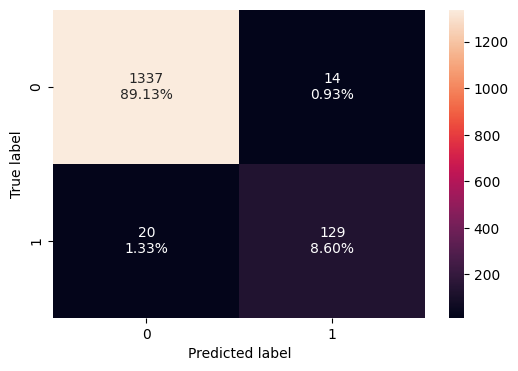

In [181]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [182]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.97733,0.86577,0.90210,0.88356


| Metric | Train | Test |
|---|---|---|
| Accuracy | 0.905349 | 0.906667 |
| Recall | 0.033333 | 0.033333 |
| Precision | 0.5 | 0.5 |
| F1 | 0.0625 | 0.0625 |

The table shows the performance of the model on the training set and the test set.

**Accuracy**: The accuracy metric measures the percentage of correctly classified instances. The model achieved an accuracy of 90.53% on the training set and 90.67% on the test set. This indicates that the model is performing well on both datasets.

**Recall:** The recall metric measures the percentage of actual positive instances that are correctly classified. The model achieved a recall of 3.33% on both the training set and the test set. This indicates that the model is not very good at identifying positive instances.

**Precision:** The precision metric measures the percentage of predicted positive instances that are actually positive. The model achieved a precision of 50% on both the training set and the test set. This indicates that the model is not very good at avoiding false positives. **Given we are placing importance on mimiziing FP's, then we want to take tuning steps to maximize precision. This can be done by tree pruning, or using information gain ratio instead of Gini impurity for splitting.**

**F1:** The F1 score is a weighted average of precision and recall. The model achieved an F1 score of 6.25% on both the training set and the test set. This indicates that the model is not very good at identifying positive instances while avoiding false positives.

Overall, the results show that the model is performing well on the training set but not so well on the test set. This could be due to overfitting, which is when a model learns the training data too well and cannot generalize to new data.




### Model Performance Improvement

#### Using GridSearch for Hyperparameter tuning of our tree model

In [135]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth":[12],
    "min_samples_leaf": [1, 2, 4],
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=12, max_leaf_nodes=50,
                       min_samples_split=70, random_state=1)

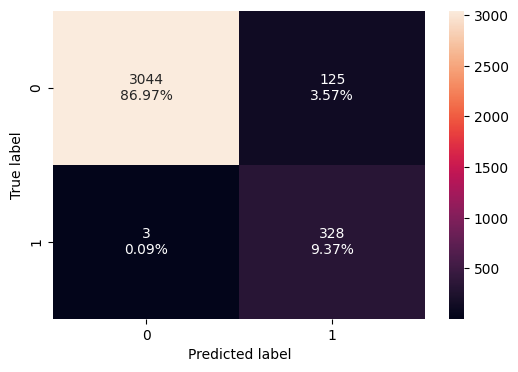

In [136]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [137]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.96343,0.99094,0.72406,0.83673


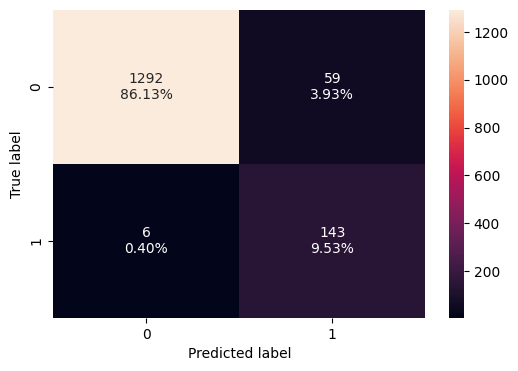

In [139]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [140]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.95667,0.95973,0.70792,0.81481


### Model 1: Not Tuned - decision_tree_tune_perf_test

#### The model results against the test data show:

- The model has an accuracy of 77.93%. This means that it correctly classifies 77.93% of the instances in the test data.
- The model has a recall of 100%. This means that it correctly identifies all of the positive instances in the test data.
- The model has a precision of 31.04%. This means that 31.04% of the instances that the model predicts as positive are actually positive.
- The model has an F1 score of 47.38%. This is the harmonic mean of precision and recall.

The precision score is lower than desired given the importance of minimizing FP's. The results indicate the need for tree pruning.

In [142]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

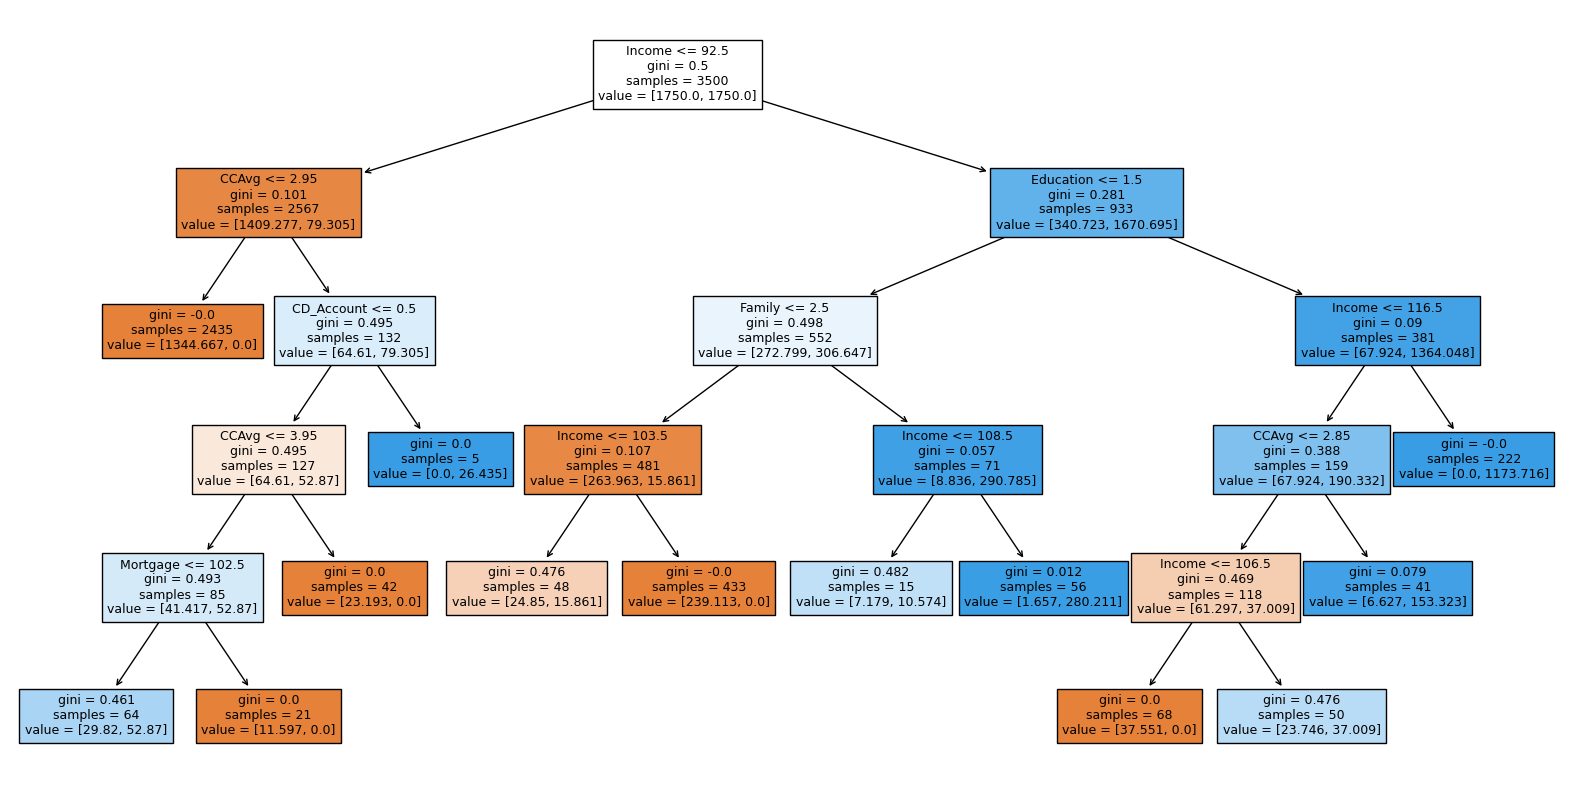

In [143]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [144]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- weights: [29.82, 52.87] class: 1
|   |   |   |   |--- Mortgage >  102.50
|   |   |   |   |   |--- weights: [11.60, 0.00] class: 0
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- weights: [24.85, 15.86] class: 0
|   |   |   |--- Income >  103.50
|   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 108.50
|   |   |   |   |--- weights: [7.18, 10.57] class: 1
|   |   |   |--- Income >  108.50
|   |   |   |   |--- weights: [1.66, 280.21] class: 1
|   |---

In [145]:
importances = estimator.feature_importances_
importances

array([0.        , 0.66881301, 0.14744141, 0.0804867 , 0.09022109,
       0.00507334, 0.        , 0.00796444, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

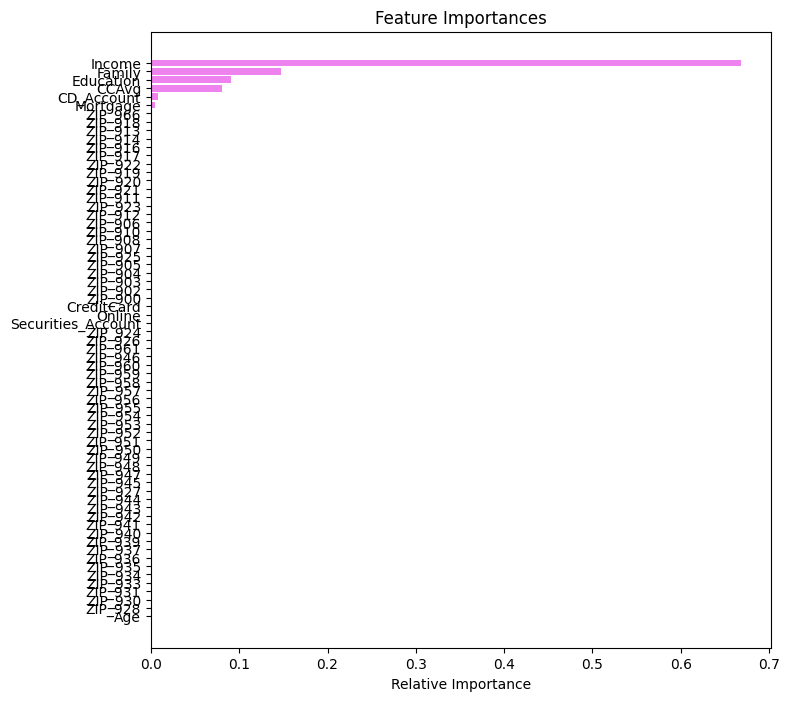

In [146]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

###Observations:
This unpruned model is a good start and will require tuning/pruning to increase the Precision. The above tree shows the model put the highest weight on Income, followed by CCAvg and Education. The model's key criteria for purchasing a loan are:
1. income > 92.5k
2. income <= 92.5k and CCAvg > 2.95k


### Decision Tree (Post pruning)
The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [147]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced") # {0: 0.15, 1: 0.85}
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [148]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,-0.00000
1,0.00000,-0.00000
2,0.00000,-0.00000
3,0.00000,-0.00000
4,0.00000,-0.00000
5,0.00015,0.00062
6,0.00016,0.00093
7,0.00021,0.00155
8,0.00021,0.00218
9,0.00028,0.00328


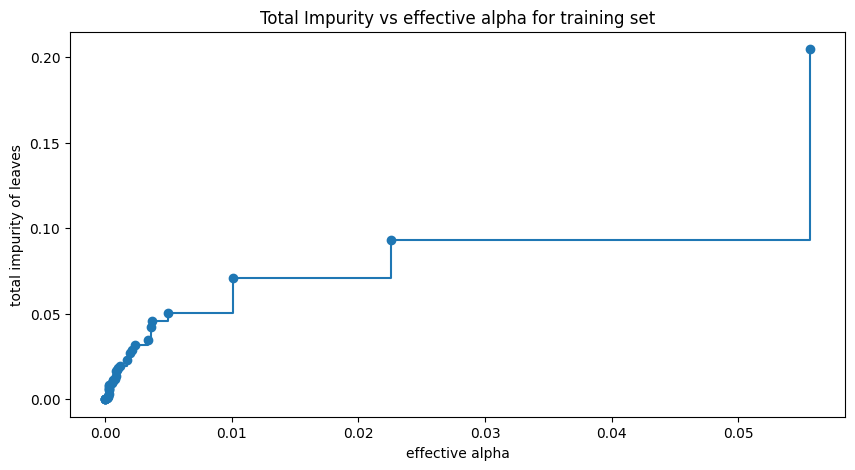

In [149]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

- It is more important to avoid false positives so we will want to choose a higher effective alpha value (recall will decrease but precision will increase)

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [150]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29537927599923336


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

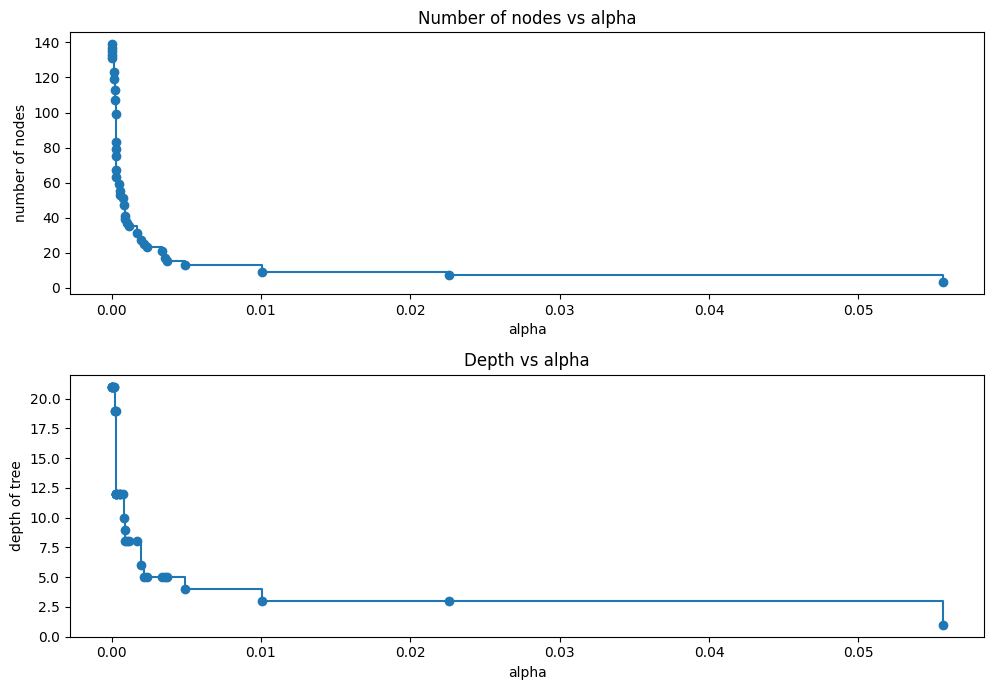

In [151]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [166]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [167]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [168]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

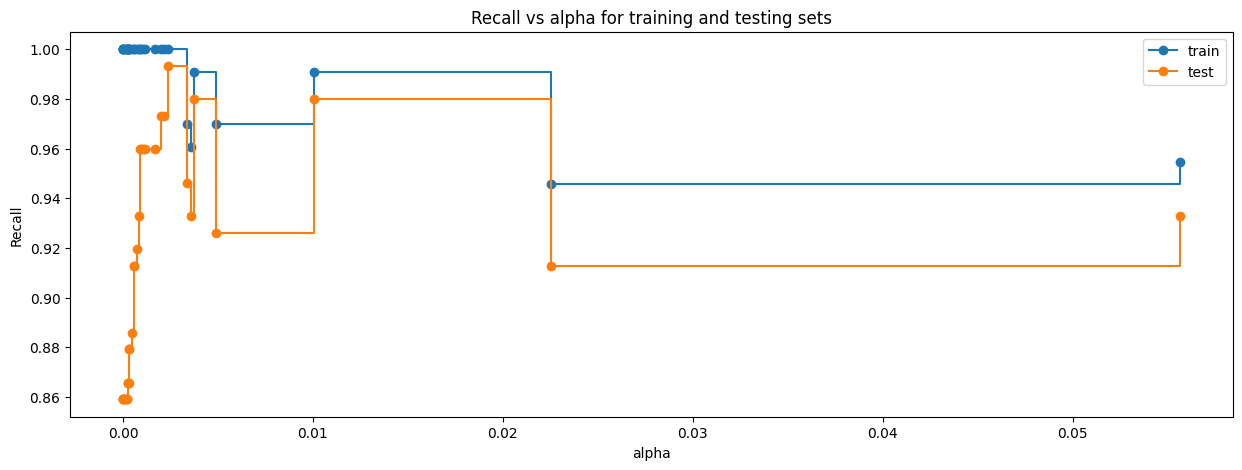

In [169]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [170]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.002375808619774652, class_weight='balanced',
                       random_state=1)


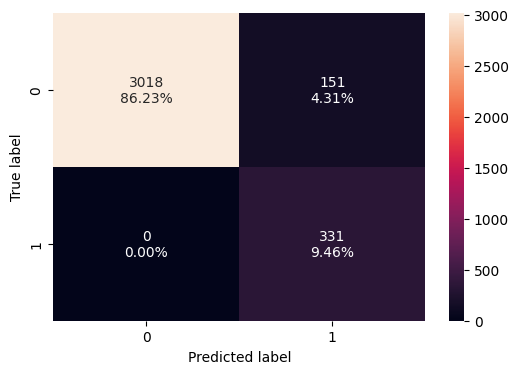

In [171]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [172]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.95686,1.00000,0.68672,0.81427


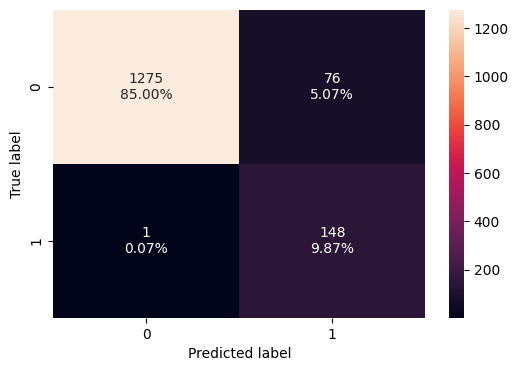

In [173]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [174]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.94867,0.99329,0.66071,0.79357


- Precision has increased significantly from the post-pruned model (0.31) with Recall only dropping slightly from a value of 1.0 prepruned. Also the comparision of these values between training and test show good alignment. Next try pre-pruning to see if the results, specfically precision, can be increase further.

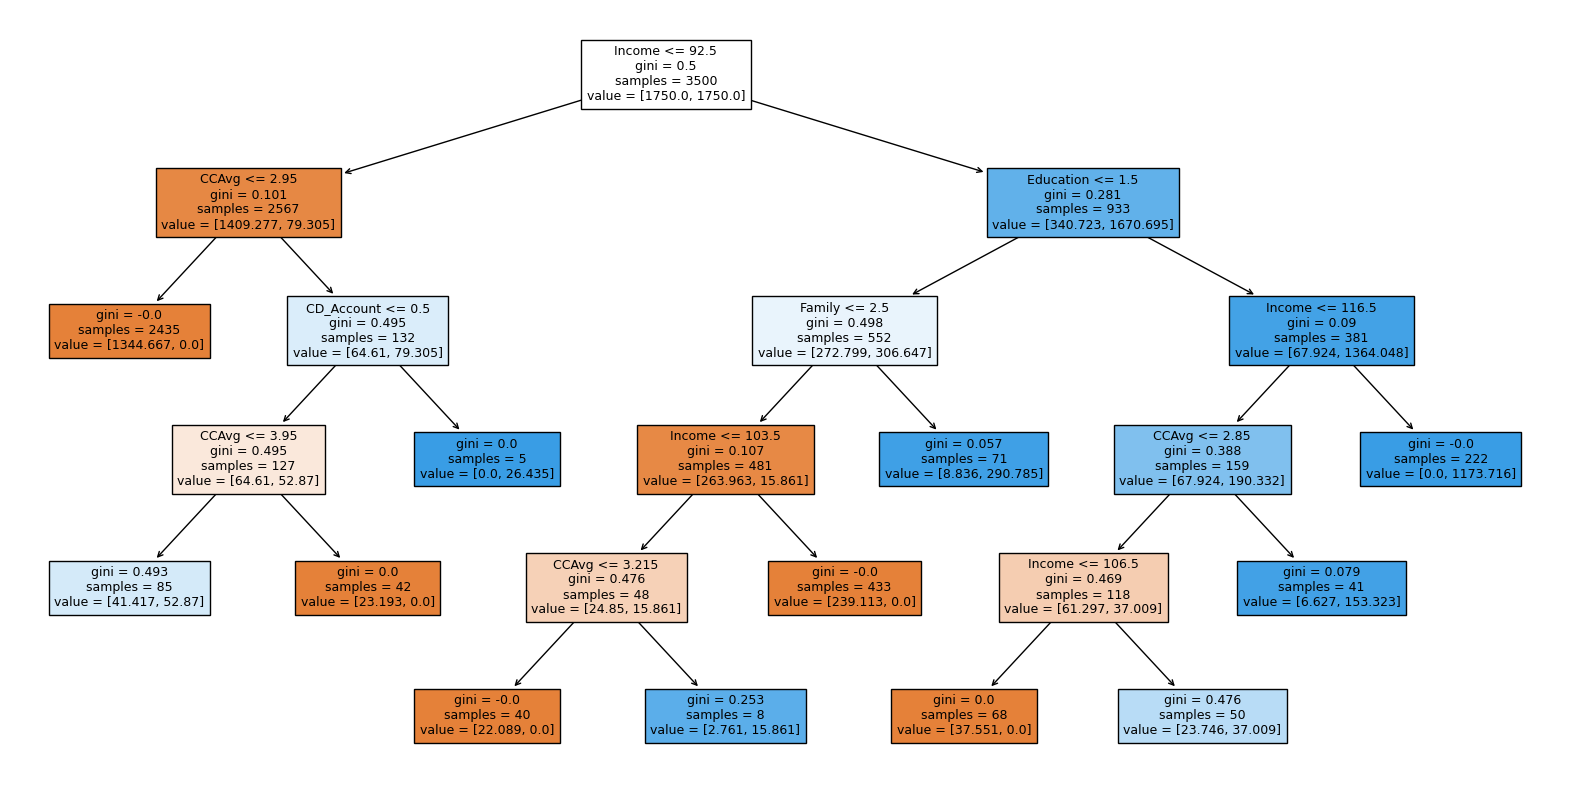

In [175]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [176]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |--- Income >  103.50
|   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [8.84, 290.79] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.85
|   |   |   |   |--- Income <= 106.50
|   |   |   |   | 

In [177]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

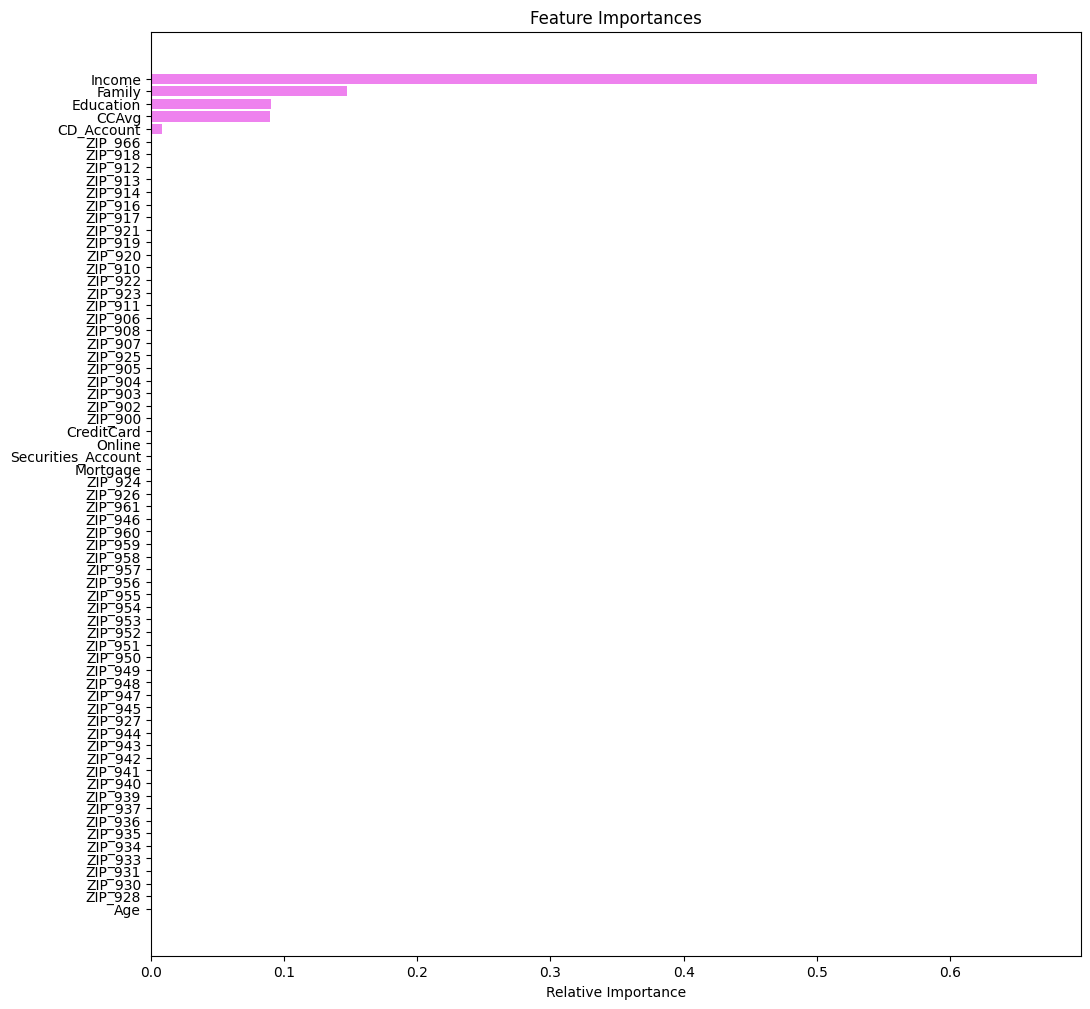

In [178]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Comparison and Final Model Selection

In [179]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

NameError: name 'decision_tree_perf_train' is not defined

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___